## Steps to do when writing a code for machine learning programs
***
 1. install all the libraries that will be needed in the code.
 2. import those libraries into the code.
 3. in this step load the data so that you can read and use the data to code
 4. do a data exploration on the data imported and try to find missing values to other things

***

# Import libraries

In [112]:
# import libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.kernel_approximation import RBFSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Load data for use

In [28]:
df=pd.read_csv("C:/Users/igloo/Documents/deep learning projects/mushroom/archive/mushroom_cleaned.csv")
df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


# data exploration

In [29]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [30]:
df.tail()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1
54034,72,5,3,2,1.158311,492,12,0.888450,1


In [31]:
df.min(axis=0)

cap-diameter       0.000000
cap-shape          0.000000
gill-attachment    0.000000
gill-color         0.000000
stem-height        0.000426
stem-width         0.000000
stem-color         0.000000
season             0.027372
class              0.000000
dtype: float64

In [32]:
df.max(axis=0)

cap-diameter       1891.000000
cap-shape             6.000000
gill-attachment       6.000000
gill-color           11.000000
stem-height           3.835320
stem-width         3569.000000
stem-color           12.000000
season                1.804273
class                 1.000000
dtype: float64

In [35]:
normal= MinMaxScaler()
normalized_df=normal.fit_transform(df)

In [39]:
normalized_df

array([[0.72554204, 0.33333333, 0.33333333, ..., 0.91666667, 1.        ,
        1.        ],
       [0.77260709, 0.33333333, 0.33333333, ..., 0.91666667, 1.        ,
        1.        ],
       [0.72501322, 0.33333333, 0.33333333, ..., 0.91666667, 1.        ,
        1.        ],
       ...,
       [0.0433633 , 0.83333333, 0.5       , ..., 1.        , 0.48459557,
        1.        ],
       [0.04177684, 0.33333333, 0.5       , ..., 1.        , 0.48459557,
        1.        ],
       [0.03807509, 0.83333333, 0.5       , ..., 1.        , 0.48459557,
        1.        ]])

In [40]:
normalized_df=pd.DataFrame(normalized_df, columns=df.columns)
normalized_df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,0.725542,0.333333,0.333333,0.909091,0.992737,0.432894,0.916667,1.000000,1.0
1,0.772607,0.333333,0.333333,0.909091,0.992737,0.436257,0.916667,1.000000,1.0
2,0.725013,0.333333,0.333333,0.909091,0.941896,0.438778,0.916667,1.000000,1.0
3,0.666843,1.000000,0.333333,0.909091,0.987549,0.438778,0.916667,1.000000,1.0
4,0.690111,1.000000,0.333333,0.909091,0.967835,0.410199,0.916667,0.515404,1.0
...,...,...,...,...,...,...,...,...,...
54030,0.038604,0.833333,0.500000,0.181818,0.231379,0.159428,1.000000,0.515404,1.0
54031,0.043363,0.333333,0.500000,0.181818,0.309197,0.137293,1.000000,0.515404,1.0
54032,0.043363,0.833333,0.500000,0.181818,0.238642,0.163631,1.000000,0.484596,1.0
54033,0.041777,0.333333,0.500000,0.181818,0.269769,0.137574,1.000000,0.484596,1.0


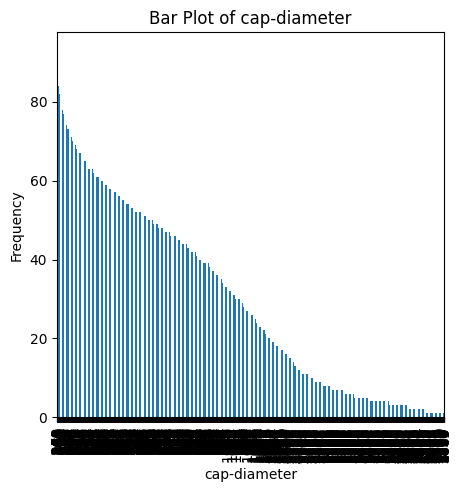

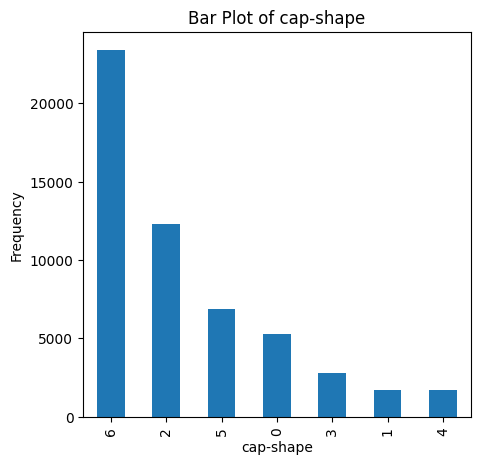

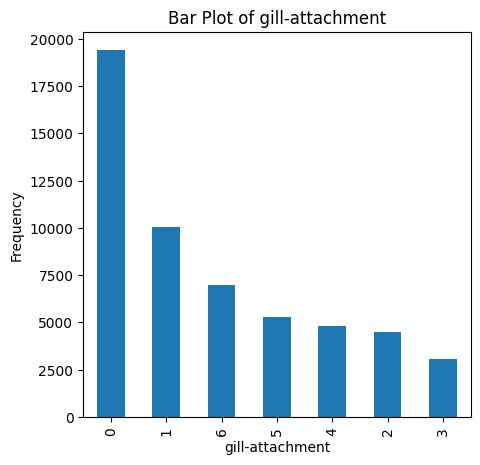

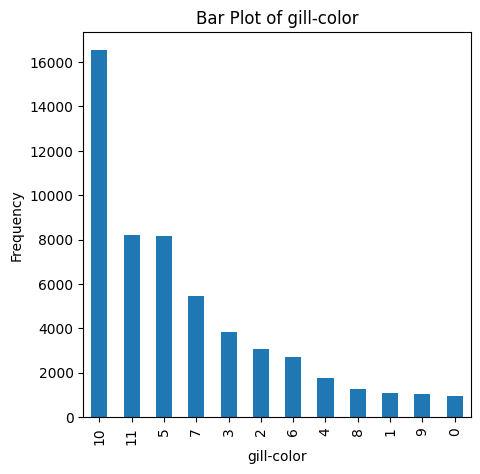

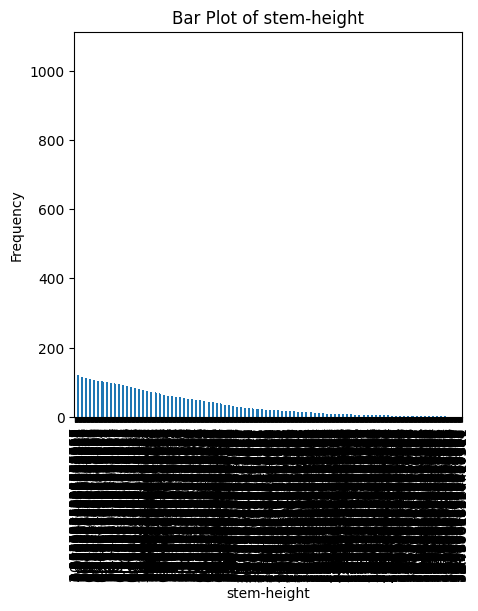

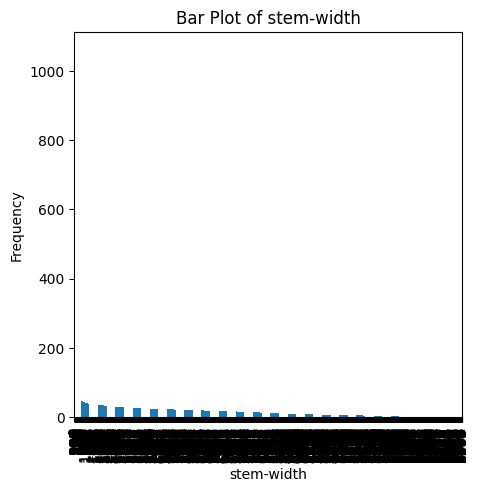

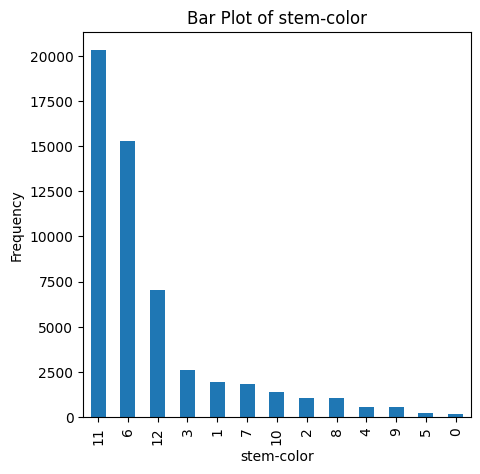

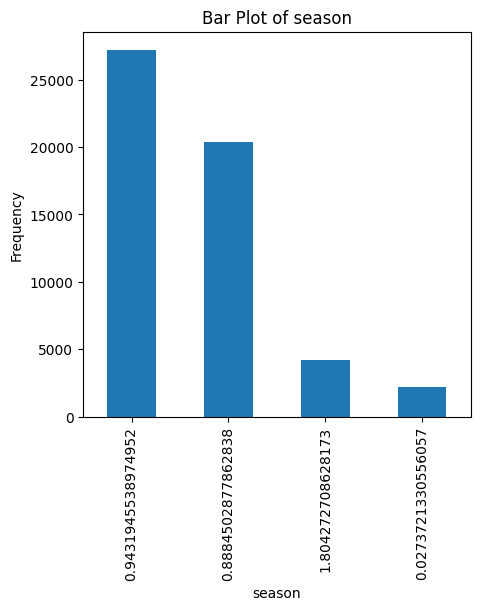

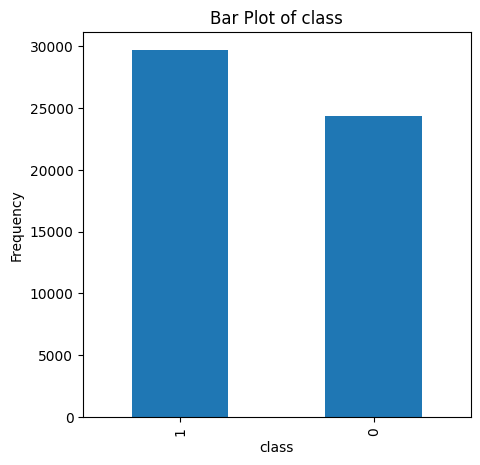

In [42]:
for column in df.columns:
    plt.figure(figsize=(5,5))
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [47]:
if df.isna().any().any():
    print("there are missing values in the table")

else:
    print("there is no missing values on the df")

there is no missing values on the df


In [48]:
df.isna().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [51]:
X=df.drop("class",axis=1)
y=df["class"]

In [52]:
X

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,1372,2,2,10,3.807467,1545,11,1.804273
1,1461,2,2,10,3.807467,1557,11,1.804273
2,1371,2,2,10,3.612496,1566,11,1.804273
3,1261,6,2,10,3.787572,1566,11,1.804273
4,1305,6,2,10,3.711971,1464,11,0.943195
...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195
54031,82,2,3,2,1.186164,490,12,0.943195
54032,82,5,3,2,0.915593,584,12,0.888450
54033,79,2,3,2,1.034963,491,12,0.888450


In [53]:
y

0        1
1        1
2        1
3        1
4        1
        ..
54030    1
54031    1
54032    1
54033    1
54034    1
Name: class, Length: 54035, dtype: int64

In [55]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [56]:
X_train

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
10135,242,6,0,10,1.276830,238,6,0.888450
5457,601,5,1,10,0.469946,704,11,0.943195
1411,887,2,0,10,1.997027,1499,11,0.943195
2908,343,2,2,5,0.589316,305,11,0.943195
1895,625,0,2,10,2.534190,1149,11,0.888450
...,...,...,...,...,...,...,...,...
11284,284,0,0,3,0.235186,506,10,0.888450
44732,973,6,4,6,1.328557,2812,10,0.943195
38158,88,0,0,5,0.720623,83,6,0.888450
860,1276,2,0,10,2.343199,1735,11,0.943195


In [57]:
y_train

10135    1
5457     0
1411     1
2908     1
1895     1
        ..
11284    1
44732    1
38158    1
860      0
15795    0
Name: class, Length: 43228, dtype: int64

In [76]:
clf=make_pipeline(StandardScaler(),SGDClassifier(max_iter=10000, tol=1e-3))

In [77]:
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(max_iter=10000))])

In [78]:
clf.score(X_test, y_test)

0.6353289534560933

# its not working

so here we can see that SGD Classifier is not working for 
this daatset, i will try kernal approximation

In [83]:

gamma = 1.0  # You may need to adjust this parameter based on your data

# Create the pipeline with RBFSampler and SGDClassifier
clf = make_pipeline(RBFSampler(gamma=gamma), SGDClassifier(max_iter=10000, tol=1e-3))

In [84]:
clf.fit(X_train, y_train)

Pipeline(steps=[('rbfsampler', RBFSampler()),
                ('sgdclassifier', SGDClassifier(max_iter=10000))])

In [85]:
clf.score(X_test, y_test)

0.5457573794762653

In [120]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)
X

array([[ 2.23613935, -0.92586356, -0.06373657, ...,  0.63157015,
         0.79150827,  2.78840159],
       [ 2.48344371, -0.92586356, -0.06373657, ...,  0.64691446,
         0.79150827,  2.78840159],
       [ 2.23336064, -0.92586356, -0.06373657, ...,  0.65842269,
         0.79150827,  2.78840159],
       ...,
       [-1.34838452,  0.46271335,  0.38493533, ..., -0.59725336,
         1.09806419, -0.20849016],
       [-1.35672062, -0.92586356,  0.38493533, ..., -0.71617177,
         1.09806419, -0.20849016],
       [-1.37617152,  0.46271335,  0.38493533, ..., -0.71489307,
         1.09806419, -0.20849016]])

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

In [122]:
nbrs = KNeighborsClassifier(algorithm='auto', n_neighbors=5, weights="uniform", leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
nbrs.fit(X_train, y_train)


KNeighborsClassifier()

In [123]:
y_pred= nbrs.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print("validation accuracy:", accuracy)

validation accuracy: 0.9865410497981157


In [110]:
svc=LinearSVC(dual="auto", random_state=42, tol=1e-5)
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("validation accuracy:", accuracy)

validation accuracy: 0.6380123993707782


In [116]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.6513370963264551
